In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tools.eval_measures import rmse


In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.multioutput import MultiOutputRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import root_mean_squared_error

In [6]:
Consumer_spend = pd.read_excel("C:\\Git_test\\Project 2 Docs\\Data Sets\\Consumer_Spend_Transformed.xlsx")
Consumer_spend

,Time Period,Total Expenditure,Net Tourism,Total Domestic Expenditure,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furnishings, Household Equipment And Routine Maintenance Of The House",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous,Total Actual Expenditure
0,2015-01-01,284109,1532,282577,22867,9687,12672,82024,12517,6095,38565,6006,26228,5788,26856,33272,357145
1,2015-04-01,291768,2467,289301,22803,9604,14670,77399,12864,6142,40784,5909,27866,5940,30435,34885,367511
2,2015-07-01,304643,6754,297889,22809,9785,15219,76762,13244,6204,46368,6156,27712,6079,33162,34389,379535
3,2015-10-01,307511,801,306710,23966,10662,19206,80946,15707,6675,37991,7060,30054,6209,31037,37197,381329
4,2016-01-01,296024,1975,294049,23659,9306,13372,85184,13074,6467,40829,6645,26676,6332,27523,34982,369527
5,2016-04-01,306475,3809,302666,24099,9546,15281,81289,13298,6459,42373,6752,27963,6437,32118,37051,385787
6,2016-07-01,321169,8331,312838,24483,9717,15863,80063,13787,6661,47769,7055,27917,6530,35249,37744,402679
7,2016-10-01,325677,1739,323938,25865,10753,20008,85233,16169,6933,39445,8372,31158,6608,33250,40144,406628
8,2017-01-01,307646,2008,305638,24778,9658,13809,85683,14045,6754,42630,6716,28440,6674,29885,36566,384355
9,2017-04-01,318842,4288,314554,26057,10326,15489,81466,14663,6915,43204,6884,30312,6744,34144,38350,401766


In [7]:
print(Consumer_spend.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['Time Period', 'Total Expenditure', 'Net Tourism',
       'Total Domestic Expenditure', 'Food And Drink',
       'Alcohol, Tobacco And Narcotics', 'Clothing And Footwear', 'Housing',
       'Furnishings, Household Equipment And Routine Maintenance Of The House',
       'Health', 'Transport', 'Communication', 'Recreation And Culture',
       'Education', 'Restaurants And Hotels', 'Miscellaneous',
       'Total Actual Expenditure'],
      dtype='object')>


In [8]:
Consumer_spend.drop(["Total Actual Expenditure","Total Expenditure","Net Tourism","Total Domestic Expenditure"], axis=1, inplace=True)

In [9]:
Consumer_spend.rename(columns={'Furnishings, Household Equipment And Routine Maintenance Of The House':'Furniture, Household Equipment And Maintenance'}, inplace=True)
print(Consumer_spend.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['Time Period', 'Food And Drink', 'Alcohol, Tobacco And Narcotics',
       'Clothing And Footwear', 'Housing',
       'Furniture, Household Equipment And Maintenance', 'Health', 'Transport',
       'Communication', 'Recreation And Culture', 'Education',
       'Restaurants And Hotels', 'Miscellaneous'],
      dtype='object')>


In [10]:
print(list(enumerate(Consumer_spend.columns)))

[(0, 'Time Period'), (1, 'Food And Drink'), (2, 'Alcohol, Tobacco And Narcotics'), (3, 'Clothing And Footwear'), (4, 'Housing'), (5, 'Furniture, Household Equipment And Maintenance'), (6, 'Health'), (7, 'Transport'), (8, 'Communication'), (9, 'Recreation And Culture'), (10, 'Education'), (11, 'Restaurants And Hotels'), (12, 'Miscellaneous')]


In [11]:
Consumer_spend.isna().sum().sum()

0

In [12]:
Consumer_spend_copy = Consumer_spend.copy()
Sliced_for_scaler = Consumer_spend_copy.iloc[:, 1:13]

print(Sliced_for_scaler.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['Food And Drink', 'Alcohol, Tobacco And Narcotics',
       'Clothing And Footwear', 'Housing',
       'Furniture, Household Equipment And Maintenance', 'Health', 'Transport',
       'Communication', 'Recreation And Culture', 'Education',
       'Restaurants And Hotels', 'Miscellaneous'],
      dtype='object')>


In [13]:
cols = Sliced_for_scaler.columns

In [14]:
transform = preprocessing.StandardScaler()
Sliced_for_scaler = transform.fit_transform(Sliced_for_scaler)
Sliced_for_scaler

array([[-1.40205654, -1.41696226, -1.40953797, -0.91318812, -1.78189122,
        -0.99502192, -0.75981788, -1.81226929, -1.50564436, -1.51719075,
        -0.97986921, -1.24175869],
       [-1.41624221, -1.48683608, -0.75059902, -1.33431942, -1.64504611,
        -0.95222265, -0.48272944, -1.94697436, -1.1467242 , -1.40630481,
        -0.55067683, -1.03090489],
       [-1.41491231, -1.33446064, -0.56953922, -1.39232172, -1.49518692,
        -0.89576404,  0.21454946, -1.60396247, -1.18046883, -1.30490254,
        -0.22365597, -1.09574276],
       [-1.15846202, -0.59615532,  0.74537049, -1.01134586, -0.52386272,
        -0.46686073, -0.83149376, -0.34856674, -0.66728751, -1.21006589,
        -0.47848521, -0.72867676],
       [-1.2265089 , -1.73770836, -1.17867847, -0.625453  , -1.56222919,
        -0.65627026, -0.47711025, -0.92488226, -1.40747816, -1.12033582,
        -0.89988281, -1.01822491],
       [-1.12898243, -1.53566357, -0.54909166, -0.98011385, -1.47389114,
        -0.66355524, -

In [15]:
df_post_scale = pd.DataFrame(Sliced_for_scaler, columns = cols)
df_post_scale

,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furniture, Household Equipment And Maintenance",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous
0,-1.402057,-1.416962,-1.409538,-0.913188,-1.781891,-0.995022,-0.759818,-1.812269,-1.505644,-1.517191,-0.979869,-1.241759
1,-1.416242,-1.486836,-0.750599,-1.334319,-1.645046,-0.952223,-0.482729,-1.946974,-1.146724,-1.406305,-0.550677,-1.030905
2,-1.414912,-1.334461,-0.569539,-1.392322,-1.495187,-0.895764,0.214549,-1.603962,-1.180469,-1.304903,-0.223656,-1.095743
3,-1.158462,-0.596155,0.745370,-1.011346,-0.523863,-0.466861,-0.831494,-0.348567,-0.667288,-1.210066,-0.478485,-0.728677
4,-1.226509,-1.737708,-1.178678,-0.625453,-1.562229,-0.656270,-0.477110,-0.924882,-1.407478,-1.120336,-0.899883,-1.018225
5,-1.128982,-1.535664,-0.549092,-0.980114,-1.473891,-0.663555,-0.284310,-0.776290,-1.125469,-1.043737,-0.348852,-0.747762
6,-1.043868,-1.391707,-0.357148,-1.091748,-1.281046,-0.479609,0.389494,-0.355510,-1.135549,-0.975892,0.026616,-0.657172
7,-0.737547,-0.519547,1.009870,-0.620991,-0.341665,-0.231920,-0.649932,1.473424,-0.425378,-0.918990,-0.213103,-0.343440
8,-0.978481,-1.441376,-1.034556,-0.580016,-1.179300,-0.394922,-0.252218,-0.826284,-1.020949,-0.870842,-0.616633,-0.811162
9,-0.694990,-0.879018,-0.480493,-0.963997,-0.935581,-0.248311,-0.180542,-0.592980,-0.610754,-0.819777,-0.105895,-0.577955


In [16]:
Y = df_post_scale
X = df_post_scale


print(Y.shape)
print(X.shape)

(41, 12)
(41, 12)


In [17]:
Y

,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furniture, Household Equipment And Maintenance",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous
0,-1.402057,-1.416962,-1.409538,-0.913188,-1.781891,-0.995022,-0.759818,-1.812269,-1.505644,-1.517191,-0.979869,-1.241759
1,-1.416242,-1.486836,-0.750599,-1.334319,-1.645046,-0.952223,-0.482729,-1.946974,-1.146724,-1.406305,-0.550677,-1.030905
2,-1.414912,-1.334461,-0.569539,-1.392322,-1.495187,-0.895764,0.214549,-1.603962,-1.180469,-1.304903,-0.223656,-1.095743
3,-1.158462,-0.596155,0.745370,-1.011346,-0.523863,-0.466861,-0.831494,-0.348567,-0.667288,-1.210066,-0.478485,-0.728677
4,-1.226509,-1.737708,-1.178678,-0.625453,-1.562229,-0.656270,-0.477110,-0.924882,-1.407478,-1.120336,-0.899883,-1.018225
5,-1.128982,-1.535664,-0.549092,-0.980114,-1.473891,-0.663555,-0.284310,-0.776290,-1.125469,-1.043737,-0.348852,-0.747762
6,-1.043868,-1.391707,-0.357148,-1.091748,-1.281046,-0.479609,0.389494,-0.355510,-1.135549,-0.975892,0.026616,-0.657172
7,-0.737547,-0.519547,1.009870,-0.620991,-0.341665,-0.231920,-0.649932,1.473424,-0.425378,-0.918990,-0.213103,-0.343440
8,-0.978481,-1.441376,-1.034556,-0.580016,-1.179300,-0.394922,-0.252218,-0.826284,-1.020949,-0.870842,-0.616633,-0.811162
9,-0.694990,-0.879018,-0.480493,-0.963997,-0.935581,-0.248311,-0.180542,-0.592980,-0.610754,-0.819777,-0.105895,-0.577955


In [18]:
tscv = TimeSeriesSplit(n_splits=3)

In [19]:
all_sectors_data = {}

lags_option = [[1]]
best_scores = [-float('inf')] * 12
best_lags = [None] * 12

for i in range(12):
    if best_lags[i] is None or not best_lags[i]:
        best_lags[i] = lags_option[0]

    y = Y.iloc[:, i]

    X_lagged = pd.concat([X.shift(lag) 
                              for lag in best_lags[i]], axis=1).dropna()
        
    y_lagged = y.loc[X_lagged.index]
        
    X_train, X_test, Y_train, Y_test = train_test_split(X_lagged, y_lagged, test_size=0.2, random_state=1)
    
    all_sectors_data[i] = {
        'X_train': X_train, 'X_test': X_test,
        'Y_train': Y_train, 'Y_test': Y_test
    }

    

    Model = {
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'params': {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'selection': ['cyclic', 'random']}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'alpha': [0.001, 0.01, 0.1, 1], 'solver': ['auto', 'svd', 'cholesky', 'lsqr']}
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=1),
        'params': {'n_estimators': [100, 200, 300], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
    }
}

print(best_lags)

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]


In [20]:
y_lagged.shape


(40,)

In [21]:
X_lagged.shape

(40, 12)

In [22]:
X_test.shape

(8, 12)

In [23]:
Y_test.shape

(8,)

In [24]:
y.shape

(41,)

In [25]:
all_results = {}

for model_name, model_info in Model.items():
    print(f"\nTraining {model_name}")
    all_results[model_name] = {}
    
    for i in range(12):

        data = all_sectors_data[i]

        grid = GridSearchCV(model_info['model'], model_info['params'], cv=tscv, scoring='neg_mean_squared_error')

        grid.fit(data['X_train'], data['Y_train'])

        y_pred = grid.best_estimator_.predict(data['X_test'])

        r2_train = r2_score(data['Y_train'], grid.best_estimator_.predict(data['X_train']))
        r2_test = r2_score(data['Y_test'], y_pred)
        
        all_results[model_name][i] = {
            'best_params': grid.best_params_,
            'best_score': grid.best_score_,
            'model': grid.best_estimator_,
            'predictions': y_pred,
            'r2_train': r2_train,
            'r2_test': r2_test

        }
Best_model = grid.best_estimator_
        


Training Lasso


c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.120e-03, tolerance: 2.629e-03
  model = cd_fast.enet_coordinate_descent(



Training Ridge

Training RandomForest


Store predictions for each models

In [26]:
for model_name in all_results:
    for sector in all_results[model_name]:
        print(f"Model: {model_name}, Sector: {sector}")
        print(f"Best Parameters: {all_results[model_name][sector]['best_params']}")
        print(f"Best Score: {all_results[model_name][sector]['best_score']}")
        print(f"R² Test Score: {all_results[model_name][sector]['r2_test']:.3f}")
   
print()
print("Cross-val train score:", grid.score(X_train, Y_train))
print("Final test score:", grid.score(X_test, Y_test))
print(f"Train R2: {r2_train:.3f}")
print(f"Test R2: {r2_test:.3f}")

Model: Lasso, Sector: 0
Best Parameters: {'alpha': 0.01, 'selection': 'random'}
Best Score: -0.04868171078622386
R² Test Score: 0.961
Model: Lasso, Sector: 1
Best Parameters: {'alpha': 0.1, 'selection': 'cyclic'}
Best Score: -0.3852517695584594
R² Test Score: 0.400
Model: Lasso, Sector: 2
Best Parameters: {'alpha': 0.1, 'selection': 'random'}
Best Score: -0.5217488160013639
R² Test Score: -0.819
Model: Lasso, Sector: 3
Best Parameters: {'alpha': 0.01, 'selection': 'random'}
Best Score: -0.06552154736863051
R² Test Score: 0.886
Model: Lasso, Sector: 4
Best Parameters: {'alpha': 0.01, 'selection': 'random'}
Best Score: -0.27422094485517845
R² Test Score: 0.798
Model: Lasso, Sector: 5
Best Parameters: {'alpha': 0.01, 'selection': 'random'}
Best Score: -0.4109567155355958
R² Test Score: 0.918
Model: Lasso, Sector: 6
Best Parameters: {'alpha': 0.01, 'selection': 'cyclic'}
Best Score: -0.821994628517341
R² Test Score: -0.241
Model: Lasso, Sector: 7
Best Parameters: {'alpha': 0.001, 'selectio

In [27]:
print(f"Best Model: {grid.best_estimator_}")
print(f"Best parameters: {grid.best_params_}")
print(f"Best CV score (neg MSE): {grid.best_score_:.4f}")

Best Model: RandomForestRegressor(max_depth=10, n_estimators=300, random_state=1)
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best CV score (neg MSE): -0.2115


In [28]:
Sliced_for_scaler

array([[-1.40205654, -1.41696226, -1.40953797, -0.91318812, -1.78189122,
        -0.99502192, -0.75981788, -1.81226929, -1.50564436, -1.51719075,
        -0.97986921, -1.24175869],
       [-1.41624221, -1.48683608, -0.75059902, -1.33431942, -1.64504611,
        -0.95222265, -0.48272944, -1.94697436, -1.1467242 , -1.40630481,
        -0.55067683, -1.03090489],
       [-1.41491231, -1.33446064, -0.56953922, -1.39232172, -1.49518692,
        -0.89576404,  0.21454946, -1.60396247, -1.18046883, -1.30490254,
        -0.22365597, -1.09574276],
       [-1.15846202, -0.59615532,  0.74537049, -1.01134586, -0.52386272,
        -0.46686073, -0.83149376, -0.34856674, -0.66728751, -1.21006589,
        -0.47848521, -0.72867676],
       [-1.2265089 , -1.73770836, -1.17867847, -0.625453  , -1.56222919,
        -0.65627026, -0.47711025, -0.92488226, -1.40747816, -1.12033582,
        -0.89988281, -1.01822491],
       [-1.12898243, -1.53566357, -0.54909166, -0.98011385, -1.47389114,
        -0.66355524, -

In [29]:
tscv = TimeSeriesSplit(n_splits=3)

In [30]:
X_Full = X.copy()
Y_Full = Y.copy()

In [31]:
Final_model = MultiOutputRegressor(Best_model)
Final_model.fit(X_Full,Y_Full)
forecast = Final_model.predict(X_Full)



In [32]:
X_Full

,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furniture, Household Equipment And Maintenance",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous
0,-1.402057,-1.416962,-1.409538,-0.913188,-1.781891,-0.995022,-0.759818,-1.812269,-1.505644,-1.517191,-0.979869,-1.241759
1,-1.416242,-1.486836,-0.750599,-1.334319,-1.645046,-0.952223,-0.482729,-1.946974,-1.146724,-1.406305,-0.550677,-1.030905
2,-1.414912,-1.334461,-0.569539,-1.392322,-1.495187,-0.895764,0.214549,-1.603962,-1.180469,-1.304903,-0.223656,-1.095743
3,-1.158462,-0.596155,0.745370,-1.011346,-0.523863,-0.466861,-0.831494,-0.348567,-0.667288,-1.210066,-0.478485,-0.728677
4,-1.226509,-1.737708,-1.178678,-0.625453,-1.562229,-0.656270,-0.477110,-0.924882,-1.407478,-1.120336,-0.899883,-1.018225
5,-1.128982,-1.535664,-0.549092,-0.980114,-1.473891,-0.663555,-0.284310,-0.776290,-1.125469,-1.043737,-0.348852,-0.747762
6,-1.043868,-1.391707,-0.357148,-1.091748,-1.281046,-0.479609,0.389494,-0.355510,-1.135549,-0.975892,0.026616,-0.657172
7,-0.737547,-0.519547,1.009870,-0.620991,-0.341665,-0.231920,-0.649932,1.473424,-0.425378,-0.918990,-0.213103,-0.343440
8,-0.978481,-1.441376,-1.034556,-0.580016,-1.179300,-0.394922,-0.252218,-0.826284,-1.020949,-0.870842,-0.616633,-0.811162
9,-0.694990,-0.879018,-0.480493,-0.963997,-0.935581,-0.248311,-0.180542,-0.592980,-0.610754,-0.819777,-0.105895,-0.577955


In [33]:
forecast

array([[-1.37058800e+00, -1.46696554e+00, -1.38715339e+00,
        -1.03048085e+00, -1.69504913e+00, -1.00197908e+00,
        -7.74270435e-01, -1.69540916e+00, -1.41557322e+00,
        -1.43022553e+00, -9.39078947e-01, -1.16762086e+00],
       [-1.37563056e+00, -1.47009723e+00, -8.02090578e-01,
        -1.30449422e+00, -1.60173680e+00, -9.23404474e-01,
        -5.00349131e-01, -1.77273728e+00, -1.16339200e+00,
        -1.35486687e+00, -5.87431397e-01, -1.01265574e+00],
       [-1.35714782e+00, -1.36656612e+00, -5.55497461e-01,
        -1.30647285e+00, -1.52171331e+00, -8.82326283e-01,
         2.51708117e-01, -1.58749235e+00, -1.17781309e+00,
        -1.29916128e+00, -2.52700111e-01, -1.04698930e+00],
       [-1.07276580e+00, -7.03272728e-01,  7.79314532e-01,
        -1.02202150e+00, -6.55444354e-01, -4.69996308e-01,
        -7.84300062e-01, -3.50936805e-01, -6.63685888e-01,
        -1.11477937e+00, -4.79416581e-01, -7.14873009e-01],
       [-1.22214754e+00, -1.64376876e+00, -1.1355979

In [34]:
forecast.shape

(41, 12)

In [35]:
print(dir(Final_model))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_validate_data', '_validate_params', 'estimator', 'estimators_', 'feature_names_in_', 'fit', 'get_metadata_routing', 'get_params', 'n_features_in_', 'n_job

In [36]:
Final_model

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=10,
                                                     n_estimators=300,
                                                     random_state=1))

In [37]:
Future = forecast[-1,:].reshape(1, -1)

In [38]:
Future_predictions = [Future]

for pred in range(3):
    Next_prediction = Final_model.predict(Future)
    Future_predictions.append(Next_prediction)
    Future = Next_prediction


np.stack(Future_predictions)
    

c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid fea

array([[[1.61262113, 0.65229906, 0.20300349, 2.23800617, 0.50423707,
         1.85263804, 0.97142589, 1.01425051, 1.40224949, 1.8675951 ,
         0.70224195, 1.63569799]],

       [[1.60064902, 0.64106593, 0.20075976, 2.05492468, 0.54242224,
         1.81870521, 1.001136  , 1.04842671, 1.40295287, 1.84805875,
         0.79302751, 1.6125581 ]],

       [[1.5917911 , 0.63783883, 0.20017272, 1.94425411, 0.56072478,
         1.67995969, 1.05386772, 1.0336647 , 1.37669707, 1.790792  ,
         0.96006278, 1.58920819]],

       [[1.58004803, 0.65176308, 0.19857099, 1.82276524, 0.59047841,
         1.60425052, 1.07564936, 0.99978939, 1.3758498 , 1.729564  ,
         1.02958539, 1.56812368]]])

In [39]:

Array = np.vstack(Future_predictions)
np.vstack(Array).shape

(4, 12)

In [40]:
inversed = transform.inverse_transform(Array)


In [56]:
inversed

array([[ 36468.00666667,  12144.98333333,  17561.46333333,
        116631.43333333,  18313.96666667,   9222.15666667,
         52429.27333333,   8041.35333333,  39498.72333333,
         10427.79      ,  40882.98666667,  55284.11333333],
       [ 36413.99333333,  12131.64      ,  17554.66      ,
        114620.77333333,  18410.79333333,   9184.89333333,
         52667.2       ,   8065.96333333,  39501.93333333,
         10401.01      ,  41640.04      ,  55107.09666667],
       [ 36374.03      ,  12127.80666667,  17552.88      ,
        113405.35333333,  18457.20333333,   9032.53      ,
         53089.49      ,   8055.33333333,  39382.11      ,
         10322.51      ,  43032.93333333,  54928.47333333],
       [ 36321.05      ,  12144.34666667,  17548.02333333,
        112071.12333333,  18532.65      ,   8949.39      ,
         53263.92333333,   8030.94      ,  39378.24333333,
         10238.58      ,  43612.67666667,  54767.18      ]])

In [41]:
inversed.shape

(4, 12)

In [42]:
(41, 12)

(41, 12)

In [43]:
cols.shape

(12,)

In [44]:
Predicted_df = pd.DataFrame(inversed, columns = cols)
Predicted_df

,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furniture, Household Equipment And Maintenance",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous
0,36468.006667,12144.983333,17561.463333,116631.433333,18313.966667,9222.156667,52429.273333,8041.353333,39498.723333,10427.79,40882.986667,55284.113333
1,36413.993333,12131.640000,17554.660000,114620.773333,18410.793333,9184.893333,52667.200000,8065.963333,39501.933333,10401.01,41640.040000,55107.096667
2,36374.030000,12127.806667,17552.880000,113405.353333,18457.203333,9032.530000,53089.490000,8055.333333,39382.110000,10322.51,43032.933333,54928.473333
3,36321.050000,12144.346667,17548.023333,112071.123333,18532.650000,8949.390000,53263.923333,8030.940000,39378.243333,10238.58,43612.676667,54767.180000


In [45]:
Predicted_df = Predicted_df.round(0)
Predicted_df

,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furniture, Household Equipment And Maintenance",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous
0,36468.0,12145.0,17561.0,116631.0,18314.0,9222.0,52429.0,8041.0,39499.0,10428.0,40883.0,55284.0
1,36414.0,12132.0,17555.0,114621.0,18411.0,9185.0,52667.0,8066.0,39502.0,10401.0,41640.0,55107.0
2,36374.0,12128.0,17553.0,113405.0,18457.0,9033.0,53089.0,8055.0,39382.0,10323.0,43033.0,54928.0
3,36321.0,12144.0,17548.0,112071.0,18533.0,8949.0,53264.0,8031.0,39378.0,10239.0,43613.0,54767.0


In [46]:
Consumer_spend_with_future_vals = pd.concat([Consumer_spend, Predicted_df], axis=0, sort=False)
Consumer_spend_with_future_vals.reset_index(drop=True, inplace=True)
Consumer_spend_with_future_vals

,Time Period,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furniture, Household Equipment And Maintenance",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous
0,2015-01-01,22867.0,9687.0,12672.0,82024.0,12517.0,6095.0,38565.0,6006.0,26228.0,5788.0,26856.0,33272.0
1,2015-04-01,22803.0,9604.0,14670.0,77399.0,12864.0,6142.0,40784.0,5909.0,27866.0,5940.0,30435.0,34885.0
2,2015-07-01,22809.0,9785.0,15219.0,76762.0,13244.0,6204.0,46368.0,6156.0,27712.0,6079.0,33162.0,34389.0
3,2015-10-01,23966.0,10662.0,19206.0,80946.0,15707.0,6675.0,37991.0,7060.0,30054.0,6209.0,31037.0,37197.0
4,2016-01-01,23659.0,9306.0,13372.0,85184.0,13074.0,6467.0,40829.0,6645.0,26676.0,6332.0,27523.0,34982.0
5,2016-04-01,24099.0,9546.0,15281.0,81289.0,13298.0,6459.0,42373.0,6752.0,27963.0,6437.0,32118.0,37051.0
6,2016-07-01,24483.0,9717.0,15863.0,80063.0,13787.0,6661.0,47769.0,7055.0,27917.0,6530.0,35249.0,37744.0
7,2016-10-01,25865.0,10753.0,20008.0,85233.0,16169.0,6933.0,39445.0,8372.0,31158.0,6608.0,33250.0,40144.0
8,2017-01-01,24778.0,9658.0,13809.0,85683.0,14045.0,6754.0,42630.0,6716.0,28440.0,6674.0,29885.0,36566.0
9,2017-04-01,26057.0,10326.0,15489.0,81466.0,14663.0,6915.0,43204.0,6884.0,30312.0,6744.0,34144.0,38350.0


In [47]:
Consumer_spend_with_future_vals.iloc[:,1:].convert_dtypes(int)

print(Consumer_spend_with_future_vals.dtypes)

Time Period                                       datetime64[ns]
Food And Drink                                           float64
Alcohol, Tobacco And Narcotics                           float64
Clothing And Footwear                                    float64
Housing                                                  float64
Furniture, Household Equipment And Maintenance           float64
Health                                                   float64
Transport                                                float64
Communication                                            float64
Recreation And Culture                                   float64
Education                                                float64
Restaurants And Hotels                                   float64
Miscellaneous                                            float64
dtype: object


In [48]:
print(dir(Consumer_spend_with_future_vals))

['Communication', 'Education', 'Health', 'Housing', 'Miscellaneous', 'T', 'Transport', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__arrow_c_stream__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__dataframe_consortium_standard__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', 

In [49]:
Consumer_spend_with_future_vals

,Time Period,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furniture, Household Equipment And Maintenance",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous
0,2015-01-01,22867.0,9687.0,12672.0,82024.0,12517.0,6095.0,38565.0,6006.0,26228.0,5788.0,26856.0,33272.0
1,2015-04-01,22803.0,9604.0,14670.0,77399.0,12864.0,6142.0,40784.0,5909.0,27866.0,5940.0,30435.0,34885.0
2,2015-07-01,22809.0,9785.0,15219.0,76762.0,13244.0,6204.0,46368.0,6156.0,27712.0,6079.0,33162.0,34389.0
3,2015-10-01,23966.0,10662.0,19206.0,80946.0,15707.0,6675.0,37991.0,7060.0,30054.0,6209.0,31037.0,37197.0
4,2016-01-01,23659.0,9306.0,13372.0,85184.0,13074.0,6467.0,40829.0,6645.0,26676.0,6332.0,27523.0,34982.0
5,2016-04-01,24099.0,9546.0,15281.0,81289.0,13298.0,6459.0,42373.0,6752.0,27963.0,6437.0,32118.0,37051.0
6,2016-07-01,24483.0,9717.0,15863.0,80063.0,13787.0,6661.0,47769.0,7055.0,27917.0,6530.0,35249.0,37744.0
7,2016-10-01,25865.0,10753.0,20008.0,85233.0,16169.0,6933.0,39445.0,8372.0,31158.0,6608.0,33250.0,40144.0
8,2017-01-01,24778.0,9658.0,13809.0,85683.0,14045.0,6754.0,42630.0,6716.0,28440.0,6674.0,29885.0,36566.0
9,2017-04-01,26057.0,10326.0,15489.0,81466.0,14663.0,6915.0,43204.0,6884.0,30312.0,6744.0,34144.0,38350.0


In [50]:
Last_actual_date_in_col = (Consumer_spend_with_future_vals['Time Period'].dropna().iloc[-1])

In [51]:
Next_start =  Last_actual_date_in_col + pd.DateOffset(months=3)

New_dates_to_add = pd.date_range(start=Next_start, periods=4, freq='QS')

Consumer_spend_with_future_vals['Time Period'].iloc[-4:] = New_dates_to_add



C:\Users\David\AppData\Local\Temp\ipykernel_24452\2864228475.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Consumer_spend_with_future_vals['Time Period'].iloc[-4:] = New_dates_to_add
C:\Users\David\AppData\Local\Temp\ipykernel_24452\28

In [52]:
Consumer_spend_with_future_vals['Time Period'].dtype

dtype('<M8[ns]')

In [53]:
Consumer_spend_with_future_vals

,Time Period,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furniture, Household Equipment And Maintenance",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous
0,2015-01-01,22867.0,9687.0,12672.0,82024.0,12517.0,6095.0,38565.0,6006.0,26228.0,5788.0,26856.0,33272.0
1,2015-04-01,22803.0,9604.0,14670.0,77399.0,12864.0,6142.0,40784.0,5909.0,27866.0,5940.0,30435.0,34885.0
2,2015-07-01,22809.0,9785.0,15219.0,76762.0,13244.0,6204.0,46368.0,6156.0,27712.0,6079.0,33162.0,34389.0
3,2015-10-01,23966.0,10662.0,19206.0,80946.0,15707.0,6675.0,37991.0,7060.0,30054.0,6209.0,31037.0,37197.0
4,2016-01-01,23659.0,9306.0,13372.0,85184.0,13074.0,6467.0,40829.0,6645.0,26676.0,6332.0,27523.0,34982.0
5,2016-04-01,24099.0,9546.0,15281.0,81289.0,13298.0,6459.0,42373.0,6752.0,27963.0,6437.0,32118.0,37051.0
6,2016-07-01,24483.0,9717.0,15863.0,80063.0,13787.0,6661.0,47769.0,7055.0,27917.0,6530.0,35249.0,37744.0
7,2016-10-01,25865.0,10753.0,20008.0,85233.0,16169.0,6933.0,39445.0,8372.0,31158.0,6608.0,33250.0,40144.0
8,2017-01-01,24778.0,9658.0,13809.0,85683.0,14045.0,6754.0,42630.0,6716.0,28440.0,6674.0,29885.0,36566.0
9,2017-04-01,26057.0,10326.0,15489.0,81466.0,14663.0,6915.0,43204.0,6884.0,30312.0,6744.0,34144.0,38350.0


In [54]:
For_plotting = Consumer_spend_with_future_vals.copy()
For_plotting = pd.melt(
    For_plotting,
    id_vars=["Time Period"],
    value_vars=["Food And Drink", "Alcohol, Tobacco And Narcotics", "Clothing And Footwear", "Housing",	"Furniture, Household Equipment And Maintenance",	"Health",	"Transport",	"Communication",	"Recreation And Culture", "Education",	"Restaurants And Hotels",	"Miscellaneous"],
    var_name="Sector",
    value_name="Total Expenditure",
)

For_plotting


,Time Period,Sector,Total Expenditure
0,2015-01-01,Food And Drink,22867.0
1,2015-04-01,Food And Drink,22803.0
2,2015-07-01,Food And Drink,22809.0
3,2015-10-01,Food And Drink,23966.0
4,2016-01-01,Food And Drink,23659.0
...,...,...,...
535,2025-01-01,Miscellaneous,55644.0
536,2025-04-01,Miscellaneous,55284.0
537,2025-07-01,Miscellaneous,55107.0
538,2025-10-01,Miscellaneous,54928.0


In [55]:
Date_filter.dtype

NameError: name 'Date_filter' is not defined

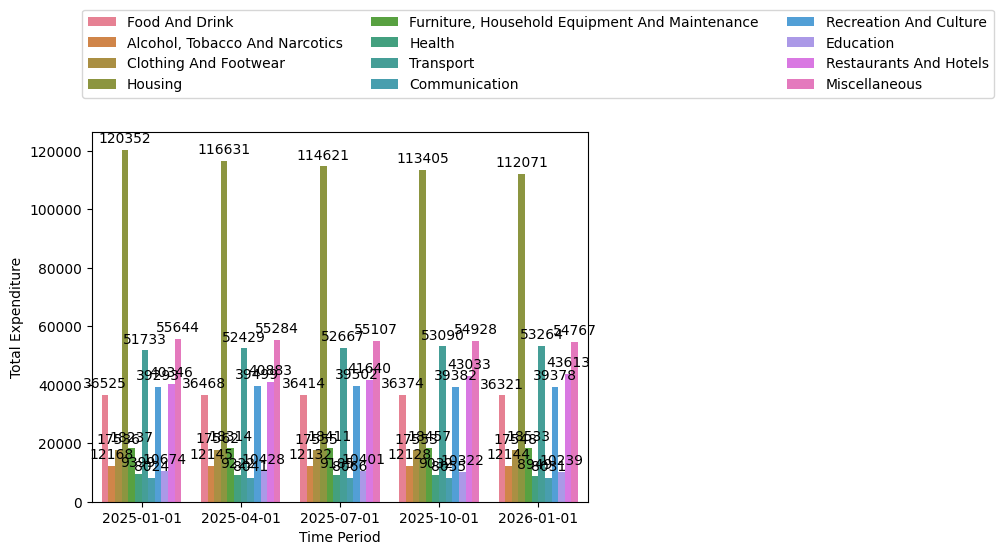

In [ ]:
sns.barplot(x='Time Period', y='Total Expenditure', legend='auto', hue="Sector", data=Date_filter)
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 1.35), ncol=3)
plt.xlabel("Time Period",fontsize=10)
plt.ylabel("Total Expenditure",fontsize=10)

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='{:.0f}', padding=3)

plt.show()

In [ ]:
print(Best_model.score(X_test, Y_test))

0.9104868225711938
